<a href="https://colab.research.google.com/github/heylakshya/youtubeRabbitHole/blob/main/notebooks/SocialProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver
!python -m spacy download en_core_web_lg

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Fetched 252 kB in 2s (121 kB/s)
Reading package lists... Done
Reading package lists... Done
Building

In [1]:
import requests
import time
import re
import json
import numpy as np
import spacy
import random
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.by import By

stopwords = set(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"])

chrome_options = Options()
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--headless')
chrome_options.add_argument('--disable-dev-shm-usage')

nlp = spacy.load('en_core_web_lg')

ModuleNotFoundError: ignored

In [2]:
def getDataFromUrl(url):
	'''
	Returns tags for the video, and list of recommended videos for the specified URL of a youtube webpage
	'''
	driver = webdriver.Chrome('chromedriver',options=chrome_options)
	driver.get(url)
	# time.sleep(8)

	try:
		w = WebDriverWait(driver, 1000)
		w.until(EC.presence_of_all_elements_located((By.TAG_NAME,"ytd-compact-video-renderer")))
		print("---\tpage loaded")
	except:
		return None, None
	src = driver.page_source
	soup = BeautifulSoup(src, 'html.parser')
	body = soup.find("body")
	
	tags = []
	# print("---\tExtracting Tags")
	tag1 = 'window["ytInitialPlayerResponse"] = '
	tag2 = 'if (window.ytcsi)'
	p1 = src.find(tag1)
	p2 = p1 + src[p1:].find(tag2)
	jsontext = src[p1 + len(tag1):p2]
	jsontext = jsontext.strip()
	jsontext = jsontext[:-1]
	try:
		jsondata = json.loads(jsontext)
		tags = jsondata["videoDetails"]["keywords"]
	except:
		return None, None


	# print("---\tExtracting Links")

	items = body.find_all("ytd-compact-video-renderer")
	# items = items.find("div", id="content")
	# items = items.find("ytd-page-manager", id="page-manager")
	# items = items.find("ytd-watch-flexy")
	# items = items.find("div", id="columns")
	# items = items.find("div", id="secondary")
	# items = items.find("div", id="secondary-inner")
	# items = items.find("div", id="related")
	# items = items.find("ytd-watch-next-secondary-results-renderer")
	# items = items.find("div", id="items")
	# items = items.find_all("ytd-compact-video-renderer")

	links = []

	for item in items:
		temp = item.find("div", id="dismissable")
		temp = temp.find("ytd-thumbnail")
		link = temp.find("a", id="thumbnail", href=True)
		links.append('https://www.youtube.com' + link['href'])
	driver.close()
	# print("---\tGot Data")
	return tags, links

In [3]:
def getRelevance(tags_source, tags_link):
    '''
    Return percentage relevance for two lists of tags
    '''
    # print("---\tCalculating relevance")
    set1 = []
    set2 = []
    for tag in tags_source:
        set1 = set1 + tag.split()
    for tag in tags_link:
        set2 = set2 + tag.split()

    set1 = " ".join(list(set(set1)))
    set2 = " ".join(list(set(set2)))

    sentence1 = nlp(set1)
    sentence2 = nlp(set2)

    sentence1 = nlp(" ".join([token.lemma_ for token in sentence1]))
    sentence2 = nlp(" ".join([token.lemma_ for token in sentence2]))

    sentence1 = nlp(" ".join(set([token.lemma_ for token in sentence1 if token.lemma_ in nlp.vocab]) - stopwords))
    sentence2 = nlp(" ".join(set([token.lemma_ for token in sentence2 if token.lemma_ in nlp.vocab]) - stopwords))

    # print("---\tsource:",sentence1)
    # print("---\tlink:",sentence2)

    # similar = []
    # for word1 in sentence1:
    # 	for word2 in sentence2:
    # 		similar.append(word1.similarity(word2))
    list1 = [token.vector for token in sentence1]
    list2 = [token.vector for token in sentence2]
    if len(list1)!=0 and len(list2)!=0:
        vec1 = sum(list1)/len(list1)
        vec2 = sum(list2)/len(list2)
    else:
        return float(0)
    # diff = vec1 - vec2

    # print(type(diff))

    # similar_arr = np.array(similar)
    # similarity = np.linalg.norm(similar_arr)/similar_arr.shape[0]

    # similarity = 1/float(np.linalg.norm(diff))

    similarity = float(vec1.dot(vec2)/(np.linalg.norm(vec1)*np.linalg.norm(vec2)))
    print("---\tsimilarity: ",similarity)
    return similarity

In [4]:
def crawl2(url, depth, first_call = 0, home_tags = None):
	'''
	Crawl the yt web graph and return relevance index
	upto defined depth.
	'''
	print("---\tat depth = {}".format(depth))
	if depth == 0:
		return []
	
	tags = home_tags
	links = None
	attempt=5
	while (tags==None or links==None) and attempt>0:
		attempt -= 1
		tags, links = getDataFromUrl(url)
		if tags == None or links == None:
			print("---\t---\tpage issues...retrying")
			continue
	
	if attempt==0:
		print("---\t---\tran out of attempts")
		return []

	temp_tags = None
	attempt = 10
	while temp_tags==None and attempt>0:
		attempt -= 1
		link = random.choice(links)
		temp_tags, _ = getDataFromUrl(link)
		if temp_tags == None:
			print("---\t---\tpage issues...skipping page")
			continue
	if attempt==0:
		print("---\t---\tran out of attempts")
		return []
	relevance_list = []
	relevance = 0
	if first_call==0:
		tags = home_tags
	relevance = getRelevance(tags, temp_tags)
	relevance_list.append(relevance)
	return_list = crawl2(link, depth-1, 0, tags)
	relevance_list = relevance_list + return_list
	return relevance_list

In [10]:
def visualize_results(results):
    y = np.array([np.array(x) for x in results])
    y_avg = np.average(y, axis=0)
    for i in range(y.shape[0]):
        plt.plot(y[i], marker='o', color='b', alpha=0.2)
    plt.plot(y_avg, marker='o', color='r')
    plt.xlabel("Depth of rabbit hole")
    plt.ylabel("Relevance to root video")
    fig = plt.gcf()
    fig.set_size_inches(10, 7)
    plt.show()

In [43]:
# Start URLs
urls = []
with open("/content/drive/MyDrive/2020/Sem7/CS522 Social Computing/CS522 Social Computing Project/youtubeRabbitHole/links2.txt","r") as file:
	urls = file.readlines()

# Each item in this list is a list with relevance
# at different depths signified by their indices
results_for_urls = []
depth_range = 16
num_links = len(urls) # MAx31
# num_links = 2
lim_urls = random.sample(urls,num_links)

results_for_json = {}
for index, url in enumerate(lim_urls):
	print("FOR \turl#{}/{}".format(index + 1, len(lim_urls)))
	result = crawl2(url, depth_range, 1)
	if len(result)==depth_range:
		# Save result in json
		results_for_json[url] = result
		with open("/content/drive/MyDrive/2020/Sem7/CS522 Social Computing/CS522 Social Computing Project/youtubeRabbitHole/results_appended_23Nov4:36.json","w") as file:
			file.write(json.dumps(results_for_json))
		results_for_urls.append(result)

FOR 	url#1/58
---	at depth = 16
---	page loaded
---	page loaded
---	similarity:  0.5724886655807495
---	at depth = 15
---	page loaded
---	page loaded
---	similarity:  0.4827033579349518
---	at depth = 14
---	page loaded
---	page loaded
---	similarity:  0.48560741543769836
---	at depth = 13
---	page loaded
---	page loaded
---	similarity:  0.5402781367301941
---	at depth = 12
---	page loaded
---	page loaded
---	similarity:  0.4827033579349518
---	at depth = 11
---	page loaded
---	page loaded
---	similarity:  0.4889777898788452
---	at depth = 10
---	page loaded
---	page loaded
---	similarity:  0.5624326467514038
---	at depth = 9
---	page loaded
---	page loaded
---	similarity:  0.495728075504303
---	at depth = 8
---	page loaded
---	page loaded
---	similarity:  0.5162898302078247
---	at depth = 7
---	page loaded
---	page loaded
---	similarity:  0.5488096475601196
---	at depth = 6
---	page loaded
---	page loaded
---	similarity:  0.544353187084198
---	at depth = 5
---	page loaded
---	page loa

WebDriverException: ignored

In [4]:
with open("/content/drive/MyDrive/2020/Sem7/CS522 Social Computing/CS522 Social Computing Project/youtubeRabbitHole/results_appended_23Nov4:36.json", "r") as file:
    string_data = file.read()
    data = json.loads(string_data)

results_for_urls = []
for value in data.values():
    results_for_urls.append(value)

print(len(results_for_urls))

68


In [8]:
links_done = set(data.keys())
print(links_done)

{'https://www.youtube.com/watch?v=OZ0Y79DhKkI\n', 'https://www.youtube.com/watch?v=AeJ9q45PfD0\n', 'https://www.youtube.com/watch?v=BXyfCGDnuWs\n', 'https://www.youtube.com/watch?v=1Pql2nNR80k\n', 'https://www.youtube.com/watch?v=34sEX6VM9sU\n', 'https://www.youtube.com/watch?v=hMgMASVsA9Y\n', 'https://www.youtube.com/watch?v=obWIBuy6X8g\n', 'https://www.youtube.com/watch?v=lgXtEfCdGn0\n', 'https://www.youtube.com/watch?v=JovtmKFxi3c\n', 'https://www.youtube.com/watch?v=kW1Lk0_j1Pg\n', 'https://www.youtube.com/watch?v=NOKJ4ZXgK4Q\n', 'https://www.youtube.com/watch?v=jy5fnU87agA\n', 'https://www.youtube.com/watch?v=Heoyxmiqh4Y\n', 'https://www.youtube.com/watch?v=aqPvVxxIDr0\n', 'https://www.youtube.com/watch?v=F1mJQiKIqH8\n', 'https://www.youtube.com/watch?v=3mnSDifDSxQ\n', 'https://www.youtube.com/watch?v=wk6Qr6OO5Xo\n', 'https://www.youtube.com/watch?v=-FuJ5mOV6Vg\n', 'https://www.youtube.com/watch?v=xl9RaHE9ZpI\n', 'https://www.youtube.com/watch?v=XFUBsMBJfkQ\n', 'https://www.youtub

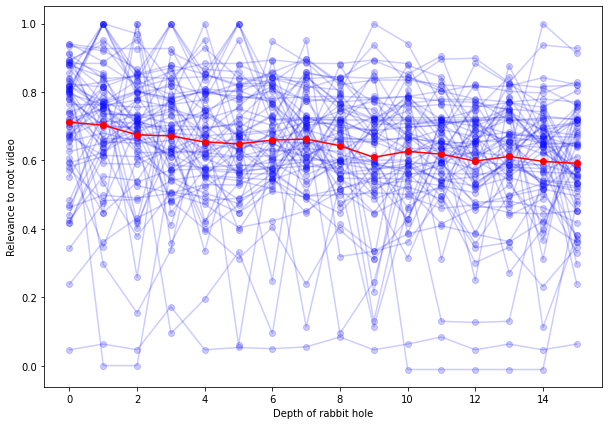

In [11]:
visualize_results(results_for_urls)

In [9]:
# Start URLs
urls = []
with open("/content/drive/MyDrive/2020/Sem7/CS522 Social Computing/CS522 Social Computing Project/youtubeRabbitHole/links.txt","r") as file:
	urls = file.readlines()

urls = list(set(urls) - links_done)
# Each item in this list is a list with relevance
# at different depths signified by their indices
results_for_urls = []
depth_range = 16
num_links = len(urls) # MAx31
# num_links = 2
lim_urls = random.sample(urls,num_links)

results_for_json = {}
for index, url in enumerate(lim_urls):
    print("FOR \turl#{}/{}".format(index + 1, len(lim_urls)))
    try:
        result = crawl2(url, depth_range, 1)
    except:
        continue
    if len(result)==depth_range:
        # Save result in json
        results_for_json[url] = result
        with open("/content/drive/MyDrive/2020/Sem7/CS522 Social Computing/CS522 Social Computing Project/youtubeRabbitHole/results_appended_23Nov6.json","w") as file:
            file.write(json.dumps(results_for_json))
            links_done.add(url)
        results_for_urls.append(result)

FOR 	url#1/49
---	at depth = 16
---	page loaded
---	page loaded
---	similarity:  0.6701833009719849
---	at depth = 15
---	page loaded
---	page loaded
---	similarity:  0.6147320866584778
---	at depth = 14
---	page loaded
---	page loaded
---	similarity:  0.6111317276954651
---	at depth = 13
---	page loaded
---	page loaded
---	similarity:  0.5503275990486145
---	at depth = 12
---	page loaded
---	page loaded


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in float_scalars


---	similarity:  nan
---	at depth = 11
---	page loaded
---	page loaded
---	similarity:  0.4741474688053131
---	at depth = 10
---	page loaded
---	page loaded
---	similarity:  0.5476309657096863
---	at depth = 9
---	page loaded
---	page loaded
---	---	page issues...skipping page
---	page loaded
---	similarity:  0.6943503618240356
---	at depth = 8
---	page loaded
---	page loaded
---	similarity:  0.5476309657096863
---	at depth = 7
---	page loaded
---	page loaded
---	similarity:  0.5468316674232483
---	at depth = 6
---	page loaded
---	page loaded
---	similarity:  0.42988038063049316
---	at depth = 5
---	page loaded
---	page loaded
---	similarity:  0.6377432346343994
---	at depth = 4
---	page loaded
---	page loaded
---	similarity:  0.5692369937896729
---	at depth = 3
---	page loaded
---	page loaded
---	similarity:  0.6545903086662292
---	at depth = 2
---	page loaded
---	page loaded
---	similarity:  0.5692369937896729
---	at depth = 1
---	page loaded
---	page loaded
---	similarity:  0.611072

In [ ]:
# Start URLs
urls = []
with open("/content/drive/MyDrive/2020/Sem7/CS522 Social Computing/CS522 Social Computing Project/youtubeRabbitHole/links.txt","r") as file:
	urls = file.readlines()

urls = list(set(urls) - links_done)
# Each item in this list is a list with relevance
# at different depths signified by their indices
results_for_urls = []
depth_range = 16
num_links = len(urls) # MAx31
# num_links = 2
lim_urls = random.sample(urls,num_links)

results_for_json = {}
for index, url in enumerate(lim_urls):
    print("FOR \turl#{}/{}".format(index + 1, len(lim_urls)))
    try:
        result = crawl2(url, depth_range, 1)
    except:
        continue
    if len(result)==depth_range:
        # Save result in json
        results_for_json[url] = result
        with open("/content/drive/MyDrive/2020/Sem7/CS522 Social Computing/CS522 Social Computing Project/youtubeRabbitHole/results_appended_23Nov7.json","w") as file:
            file.write(json.dumps(results_for_json))
        links_done.add(url)
        results_for_urls.append(result)

FOR 	url#1/7
---	at depth = 16
---	page loaded
---	page loaded
---	similarity:  0.5809594392776489
---	at depth = 15
---	page loaded
---	page loaded
---	similarity:  0.6122459769248962
---	at depth = 14
---	page loaded
---	page loaded
---	similarity:  1.0
---	at depth = 13
---	page loaded
---	page loaded
---	similarity:  0.6425989270210266
---	at depth = 12
---	page loaded
---	page loaded
---	similarity:  0.6122459769248962
---	at depth = 11
---	page loaded
---	page loaded
---	similarity:  0.6098706126213074
---	at depth = 10
---	page loaded
---	page loaded
---	similarity:  0.6139405965805054
---	at depth = 9
---	page loaded
---	page loaded
---	similarity:  0.7245116829872131
---	at depth = 8
---	page loaded
---	page loaded
---	similarity:  0.7167530655860901
---	at depth = 7
---	page loaded
---	page loaded
---	similarity:  0.6719987392425537
---	at depth = 6
---	page loaded
---	page loaded
---	similarity:  0.7245116829872131
---	at depth = 5
---	page loaded
---	page loaded
---	similar

In [ ]:
# Start URLs
urls = []
with open("/content/drive/MyDrive/2020/Sem7/CS522 Social Computing/CS522 Social Computing Project/youtubeRabbitHole/links.txt","r") as file:
	urls = file.readlines()

urls = list(set(urls) - links_done)
# Each item in this list is a list with relevance
# at different depths signified by their indices
results_for_urls = []
depth_range = 16
num_links = len(urls) # MAx31
# num_links = 2
lim_urls = random.sample(urls,num_links)

results_for_json = {}
for index, url in enumerate(lim_urls):
    print("FOR \turl#{}/{}".format(index + 1, len(lim_urls)))
    try:
        result = crawl2(url, depth_range, 1)
    except:
        continue
    if len(result)==depth_range:
        # Save result in json
        results_for_json[url] = result
        with open("/content/drive/MyDrive/2020/Sem7/CS522 Social Computing/CS522 Social Computing Project/youtubeRabbitHole/results_appended_23Nov8.json","w") as file:
            file.write(json.dumps(results_for_json))
        links_done.add(url)
        results_for_urls.append(result)